# SVC

Dataset : Wine Quality

link : https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

Objective : Build a Model to Calculate and classify Wine based on Quality depending on the Independent Features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data Ingestion
data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

## EDA

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
print("No of Rows = ", data.shape[0], '\n', "No. of Columns = ", data.shape[1])

No of Rows =  1599 
 No. of Columns =  12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observation :
No Null values found

In [11]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Observation
All the Independent features are Numerical and continuous

the Dependent Feature(Quality) is Numerical and Discrete

In [14]:
# Check range of values of individual Features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [17]:
# List of features with considerable deviation
[col for col in data.columns if data[col].max() - data[col].min() > 10]

['fixed acidity',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide']

### Observation:

We need to standardise features before model training and testing

<AxesSubplot:>

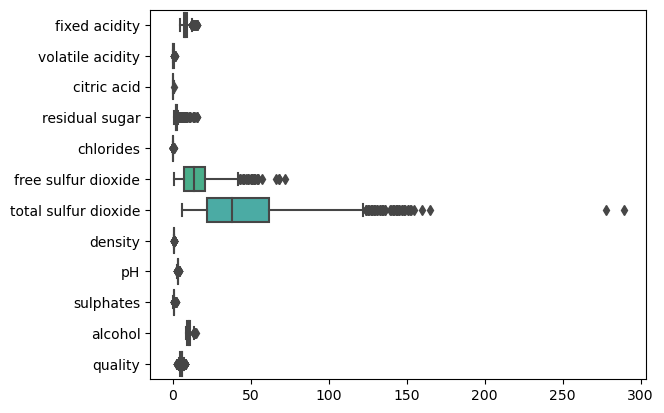

In [26]:
# Outlier Detection
sns.boxplot(data=data, orient="h")

In [ ]:
### Observation :

There are Outliers in most of the features.

In [21]:
# check for Duplicated rows
data.duplicated().sum()

240

### observation :
out of 15599 Rows, 240 are Duplicate

In [22]:
# Skewness of the data
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Feature Engineering

In [37]:
# Seperating Independent and Dependent Features
X = data.drop(["quality"], axis=1)
y = data["quality"]

In [38]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [39]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### standardization of Independent Features

Standardize features by removing the mean and scaling to unit variance.

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [34]:
scale.fit(X)

StandardScaler()

In [35]:
print(scale.mean_)

[ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]


### Split of Test and Train Data

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X_train_tf = scale.transform(X_train)

In [48]:
X_test_tf = scale.transform(X_test)

### Model Building

In [41]:
from sklearn.svm import SVC

In [163]:
model = SVC(C=2.5)

In [164]:
model.fit(X_train_tf, y_train)

SVC(C=2.5)

### Model Training Completed

In [165]:
y_predict = model.predict(X_test_tf)

### Check the Accuracy and Performance of the Model

In [171]:
# checking with any arbitrary row from the Dataset

test_input = list(data.iloc[1002])[:-1]
true_output = list(data.iloc[1002])[-1]

In [172]:
pred_output = model.predict([test_input])

In [173]:
print(true_output, pred_output)

7.0 [5]


In [169]:
from sklearn.metrics import accuracy_score

In [170]:
accuracy_score(y_test, y_predict)


0.6117424242424242

### Observation:

Accuracy of the Model is nearly 60%

This is not a Good Score for a classifier

Need to improve the Model